In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.layers import Convolution1D, MaxPooling1D
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.model_selection import train_test_split
from keras.optimizers import *
import math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
data = pd.read_csv('no_zip.csv')
data = data.drop(['Unnamed: 0'], axis = 1)
first = data[data['zip5'] == 2722]
first = first.drop(['zip5', 'date_key'], axis =1)
first
#y = data['impact_score']
#X = data.drop(['date_key', 'impact_score'], axis = 1)

,impact_score,lat,lng,5_Wave_Geopotential_Height_isobaric,Absolute_vorticity_isobaric,Apparent_temperature_height_above_ground,Best_4_layer_Lifted_Index_surface,Cloud_mixing_ratio_isobaric,Cloud_water_entire_atmosphere_single_layer,Convective_available_potential_energy_pressure_difference_layer,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,20.268081,41.5,-71.0,5493.184570,0.000099,275.700012,11.800000,0.0,0.19,19.0,...,0,0,0,0,0,0,0,0,0,0
78,20.268081,41.5,-71.0,5514.240723,0.000094,275.399994,10.700000,0.0,0.65,0.0,...,0,0,0,0,0,0,0,0,0,0
156,20.268081,41.5,-71.0,5544.382324,0.000093,274.299988,11.100000,0.0,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0
234,20.268081,41.5,-71.0,5575.850586,0.000093,275.700012,19.100000,0.0,0.00,2.0,...,0,0,0,0,0,0,0,0,0,0
312,16.868994,41.5,-71.0,5614.513184,0.000086,272.899994,22.900000,0.0,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388881,NaN,41.5,-71.0,5565.216309,0.000186,270.557709,14.358902,0.0,0.82,5.0,...,0,0,0,0,0,0,0,0,1,0
388971,NaN,41.5,-71.0,5563.294434,0.000137,271.070496,10.099735,0.0,0.55,0.0,...,0,0,0,0,0,0,0,0,0,1
389061,NaN,41.5,-71.0,5541.568848,0.000115,273.715454,7.515501,0.0,1.33,1.0,...,0,0,0,0,0,0,0,0,0,1
389151,NaN,41.5,-71.0,5532.193848,0.000189,274.989288,11.738830,0.0,0.04,0.0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
first_17_18 = first[first['year'] != 2019]
y = first_17_18['impact_score']
X = first_17_18.drop(['impact_score'], axis = 1)
X = np.expand_dims(X, axis = 2)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [13]:
model = Sequential((
        # The first conv layer learns `nb_filter` filters (aka kernels), each of size ``(filter_length, nb_input_series)``.
        # Its output will have shape (None, window_size - filter_length + 1, nb_filter), i.e., for each position in
        # the input timeseries, the activation of each filter at that position.
        #Convolution1D(nb_filter=nb_filter, filter_length=filter_length, activation='relu', input_shape=(window_size, nb_input_series)),
        Convolution1D(input_shape=(167,1), 
                      kernel_size=28, activation="relu", filters=4),
        MaxPooling1D(),     # Downsample the output of convolution by 2X.
        Dropout(0.2),
        #Convolution1D(nb_filter=nb_filter, filter_length=filter_length, activation='relu'),
        Convolution1D(kernel_size=28, activation="relu", filters=4),
        Dropout(0.2),
        #MaxPooling1D(),
        Flatten(),
        Dense(1, activation='linear'),     # For binary classification, change the activation to 'sigmoid'
    ))
opt = Adam(lr=0.001)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mae'])
model.summary()
#test_size = int(0.2 * 256921)           # In real life you'd want to use 0.2 - 0.5
#impact = data['impact_score']
#test = data.drop(['date_key', 'impact_score'], axis = 1)
#test = np.expand_dims(test, axis = 2)
#X_train, X_test, y_train, y_test = test[:-test_size], test[-test_size:], impact[:-test_size], impact[-test_size:]
#X_train, X_test, y_train, y_test = train_test_split(test, impact, test_size = 0.3)
model.fit(X_train, y_train, epochs=100, batch_size=2, validation_data=(X_test, y_test))
pred = model.predict(X_test)
print('\n\nactual', 'predicted', sep='\t')
for actual, predicted in zip(y_test, pred.squeeze()):
    print(actual.squeeze(), predicted, sep='\t')
#print('next', model.predict(q).squeeze(), sep='\t')
    
testScore = math.sqrt(mean_squared_error(y_test,pred))
print('Test Score: %.2f RMSE' % (testScore))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 140, 4)            116       
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 70, 4)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 70, 4)             0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 43, 4)             452       
_________________________________________________________________
dropout_2 (Dropout)          (None, 43, 4)             0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 172)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

AttributeError: 'float' object has no attribute 'squeeze'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7855bebe0>]],
      dtype=object)

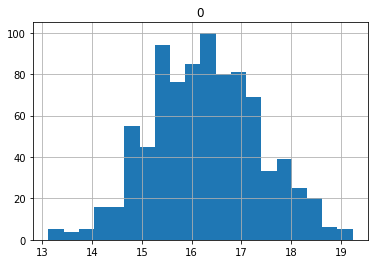

In [28]:
pred = model.predict(X_test)
pred = pd.DataFrame(pred)
pred.hist(bins = 20)

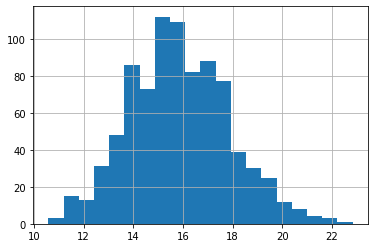

In [29]:
y_test.hist(bins = 20)

In [15]:
second = data[data['zip5'] == 37421]
second = second.drop(['zip5', 'date_key'], axis =1)
second_17_18 = second[second['year'] != 2019]
y = second_17_18['impact_score']
X = second_17_18.drop(['impact_score'], axis = 1)
X = np.expand_dims(X, axis = 2)

model = Sequential((
        # The first conv layer learns `nb_filter` filters (aka kernels), each of size ``(filter_length, nb_input_series)``.
        # Its output will have shape (None, window_size - filter_length + 1, nb_filter), i.e., for each position in
        # the input timeseries, the activation of each filter at that position.
        #Convolution1D(nb_filter=nb_filter, filter_length=filter_length, activation='relu', input_shape=(window_size, nb_input_series)),
        Convolution1D(input_shape=(167,1), 
                      kernel_size=28, activation="relu", filters=4),
        MaxPooling1D(),     # Downsample the output of convolution by 2X.
        Dropout(0.2),
        #Convolution1D(nb_filter=nb_filter, filter_length=filter_length, activation='relu'),
        Convolution1D(kernel_size=28, activation="relu", filters=4),
        Dropout(0.2),
        #MaxPooling1D(),
        Flatten(),
        Dense(1, activation='linear'),     # For binary classification, change the activation to 'sigmoid'
    ))
opt = Adam(lr=0.001)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mae'])
model.summary()
#test_size = int(0.2 * 256921)           # In real life you'd want to use 0.2 - 0.5
#impact = data['impact_score']
#test = data.drop(['date_key', 'impact_score'], axis = 1)
#test = np.expand_dims(test, axis = 2)
#X_train, X_test, y_train, y_test = test[:-test_size], test[-test_size:], impact[:-test_size], impact[-test_size:]
#X_train, X_test, y_train, y_test = train_test_split(test, impact, test_size = 0.3)
model.fit(X_train, y_train, epochs=100, batch_size=2, validation_data=(X_test, y_test))
pred = model.predict(X_test)
#print('\n\nactual', 'predicted', sep='\t')
#for actual, predicted in zip(y_test, pred.squeeze()):
#    print(actual.squeeze(), predicted, sep='\t')
#print('next', model.predict(q).squeeze(), sep='\t')
    
testScore = math.sqrt(mean_squared_error(y_test,pred))
print('Test Score: %.2f RMSE' % (testScore))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_14 (Conv1D)           (None, 140, 4)            116       
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 70, 4)             0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 70, 4)             0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 43, 4)             452       
_________________________________________________________________
dropout_4 (Dropout)          (None, 43, 4)             0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 172)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [16]:
third = data[data['zip5'] == 85043]
third = third.drop(['zip5', 'date_key'], axis =1)
third_17_18 = third[third['year'] != 2019]
y = third_17_18['impact_score']
X = third_17_18.drop(['impact_score'], axis = 1)
X = np.expand_dims(X, axis = 2)

model = Sequential((
        # The first conv layer learns `nb_filter` filters (aka kernels), each of size ``(filter_length, nb_input_series)``.
        # Its output will have shape (None, window_size - filter_length + 1, nb_filter), i.e., for each position in
        # the input timeseries, the activation of each filter at that position.
        #Convolution1D(nb_filter=nb_filter, filter_length=filter_length, activation='relu', input_shape=(window_size, nb_input_series)),
        Convolution1D(input_shape=(167,1), 
                      kernel_size=28, activation="relu", filters=4),
        MaxPooling1D(),     # Downsample the output of convolution by 2X.
        Dropout(0.2),
        #Convolution1D(nb_filter=nb_filter, filter_length=filter_length, activation='relu'),
        Convolution1D(kernel_size=28, activation="relu", filters=4),
        Dropout(0.2),
        #MaxPooling1D(),
        Flatten(),
        Dense(1, activation='linear'),     # For binary classification, change the activation to 'sigmoid'
    ))
opt = Adam(lr=0.001)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mae'])
model.summary()
#test_size = int(0.2 * 256921)           # In real life you'd want to use 0.2 - 0.5
#impact = data['impact_score']
#test = data.drop(['date_key', 'impact_score'], axis = 1)
#test = np.expand_dims(test, axis = 2)
#X_train, X_test, y_train, y_test = test[:-test_size], test[-test_size:], impact[:-test_size], impact[-test_size:]
#X_train, X_test, y_train, y_test = train_test_split(test, impact, test_size = 0.3)
model.fit(X_train, y_train, epochs=100, batch_size=2, validation_data=(X_test, y_test))
pred = model.predict(X_test)
#print('\n\nactual', 'predicted', sep='\t')
#for actual, predicted in zip(y_test, pred.squeeze()):
#    print(actual.squeeze(), predicted, sep='\t')
#print('next', model.predict(q).squeeze(), sep='\t')
    
testScore = math.sqrt(mean_squared_error(y_test,pred))
print('Test Score: %.2f RMSE' % (testScore))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 140, 4)            116       
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 70, 4)             0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 70, 4)             0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 43, 4)             452       
_________________________________________________________________
dropout_6 (Dropout)          (None, 43, 4)             0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 172)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [20]:
third = data[data['zip5'] == 85043]
third = third.drop(['zip5', 'date_key'], axis =1)
third_17_18 = third[third['year'] != 2019]
y = third_17_18['impact_score']
X = third_17_18.drop(['impact_score'], axis = 1)
X = np.expand_dims(X, axis = 2)

model = Sequential((
        # The first conv layer learns `nb_filter` filters (aka kernels), each of size ``(filter_length, nb_input_series)``.
        # Its output will have shape (None, window_size - filter_length + 1, nb_filter), i.e., for each position in
        # the input timeseries, the activation of each filter at that position.
        #Convolution1D(nb_filter=nb_filter, filter_length=filter_length, activation='relu', input_shape=(window_size, nb_input_series)),
        Convolution1D(input_shape=(167,1), 
                      kernel_size=4, activation="relu", filters=16),
        MaxPooling1D(),     # Downsample the output of convolution by 2X.
        Dropout(0.2),
        #Convolution1D(nb_filter=nb_filter, filter_length=filter_length, activation='relu'),
        Convolution1D(kernel_size=4, activation="relu", filters=16),
        Dropout(0.2),
        #MaxPooling1D(),
        Flatten(),
        Dense(1, activation='linear'),     # For binary classification, change the activation to 'sigmoid'
    ))
opt = Adam(lr=0.001)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mae'])
model.summary()
test_size = int(0.2 * 2862)           # In real life you'd want to use 0.2 - 0.5
#impact = data['impact_score']
#test = data.drop(['date_key', 'impact_score'], axis = 1)
#test = np.expand_dims(test, axis = 2)
X_train, X_test, y_train, y_test = X[:-test_size], X[-test_size:], y[:-test_size], y[-test_size:]
#X_train, X_test, y_train, y_test = train_test_split(test, impact, test_size = 0.3)
model.fit(X_train, y_train, epochs=500, batch_size=25, validation_data=(X_test, y_test))
pred = model.predict(X_test)
#print('\n\nactual', 'predicted', sep='\t')
#for actual, predicted in zip(y_test, pred.squeeze()):
#    print(actual.squeeze(), predicted, sep='\t')
#print('next', model.predict(q).squeeze(), sep='\t')
    
testScore = math.sqrt(mean_squared_error(y_test,pred))
print('Test Score: %.2f RMSE' % (testScore))

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 164, 16)           80        
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 82, 16)            0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 82, 16)            0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 79, 16)            1040      
_________________________________________________________________
dropout_10 (Dropout)         (None, 79, 16)            0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1264)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)               

In [23]:
fourth = data[data['zip5'] == 33182]
fourth = fourth.drop(['zip5', 'date_key'], axis =1)
fourth_17_18 = fourth[fourth['year'] != 2019]
y = fourth_17_18['impact_score']
X = fourth_17_18.drop(['impact_score'], axis = 1)
X = np.expand_dims(X, axis = 2)

model = Sequential((
        # The first conv layer learns `nb_filter` filters (aka kernels), each of size ``(filter_length, nb_input_series)``.
        # Its output will have shape (None, window_size - filter_length + 1, nb_filter), i.e., for each position in
        # the input timeseries, the activation of each filter at that position.
        #Convolution1D(nb_filter=nb_filter, filter_length=filter_length, activation='relu', input_shape=(window_size, nb_input_series)),
        Convolution1D(input_shape=(167,1), 
                      kernel_size=4, activation="relu", filters=16),
        MaxPooling1D(),     # Downsample the output of convolution by 2X.
        Dropout(0.2),
        #Convolution1D(nb_filter=nb_filter, filter_length=filter_length, activation='relu'),
        Convolution1D(kernel_size=4, activation="relu", filters=16),
        Dropout(0.2),
        #MaxPooling1D(),
        Flatten(),
        Dense(1, activation='linear'),
        Dense(1, activation='linear'),# For binary classification, change the activation to 'sigmoid'
    ))
opt = Adam(lr=0.001)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mae'])
model.summary()
test_size = int(0.2 * 2862)           # In real life you'd want to use 0.2 - 0.5
#impact = data['impact_score']
#test = data.drop(['date_key', 'impact_score'], axis = 1)
#test = np.expand_dims(test, axis = 2)
X_train, X_test, y_train, y_test = X[:-test_size], X[-test_size:], y[:-test_size], y[-test_size:]
#X_train, X_test, y_train, y_test = train_test_split(test, impact, test_size = 0.3)
model.fit(X_train, y_train, epochs=500, batch_size=25, validation_data=(X_test, y_test))
pred = model.predict(X_test)
#print('\n\nactual', 'predicted', sep='\t')
#for actual, predicted in zip(y_test, pred.squeeze()):
#    print(actual.squeeze(), predicted, sep='\t')
#print('next', model.predict(q).squeeze(), sep='\t')
    
testScore = math.sqrt(mean_squared_error(y_test,pred))
print('Test Score: %.2f RMSE' % (testScore))

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_24 (Conv1D)           (None, 164, 16)           80        
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 82, 16)            0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 82, 16)            0         
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 79, 16)            1040      
_________________________________________________________________
dropout_14 (Dropout)         (None, 79, 16)            0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 1264)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)               

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7e36f69f60>]],
      dtype=object)

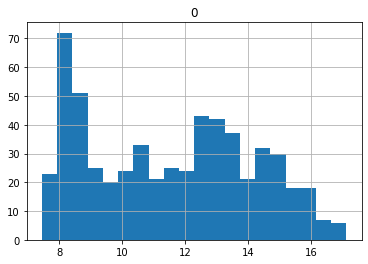

In [24]:
pred = model.predict(X_test)
pred = pd.DataFrame(pred)
pred.hist(bins = 20)

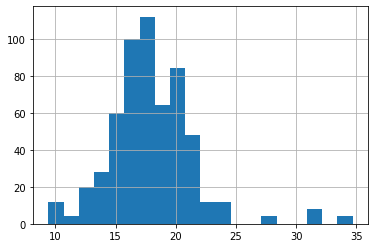

In [25]:
y_test.hist(bins = 20)

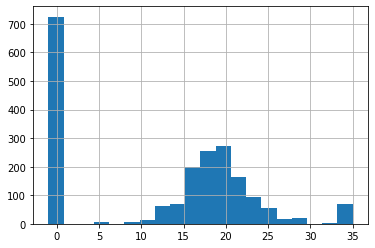

In [26]:
y_train.hist(bins = 20)

In [28]:
fifth = data[data['zip5'] == 53718]
fifth = fifth.drop(['zip5', 'date_key'], axis =1)
fifth_17_18 = fifth[fifth['year'] != 2019]
y = fifth_17_18['impact_score']
X = fifth_17_18.drop(['impact_score'], axis = 1)
X = np.expand_dims(X, axis = 2)

model = Sequential((
        # The first conv layer learns `nb_filter` filters (aka kernels), each of size ``(filter_length, nb_input_series)``.
        # Its output will have shape (None, window_size - filter_length + 1, nb_filter), i.e., for each position in
        # the input timeseries, the activation of each filter at that position.
        #Convolution1D(nb_filter=nb_filter, filter_length=filter_length, activation='relu', input_shape=(window_size, nb_input_series)),
        Convolution1D(input_shape=(167,1), 
                      kernel_size=4, activation="relu", filters=16),
        MaxPooling1D(),     # Downsample the output of convolution by 2X.
        Dropout(0.2),
        #Convolution1D(nb_filter=nb_filter, filter_length=filter_length, activation='relu'),
        Convolution1D(kernel_size=4, activation="relu", filters=16),
        Dropout(0.2),
        #MaxPooling1D(),
        Flatten(),
        Dense(1, activation='linear'),
        Dense(1, activation='linear'),# For binary classification, change the activation to 'sigmoid'
    ))
opt = Adam(lr=0.001)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mae'])
model.summary()
test_size = int(0.2 * 2862)           # In real life you'd want to use 0.2 - 0.5
#impact = data['impact_score']
#test = data.drop(['date_key', 'impact_score'], axis = 1)
#test = np.expand_dims(test, axis = 2)
X_train, X_test, y_train, y_test = X[:-test_size], X[-test_size:], y[:-test_size], y[-test_size:]
#X_train, X_test, y_train, y_test = train_test_split(test, impact, test_size = 0.3)
model.fit(X_train, y_train, epochs=500, batch_size=25, validation_data=(X_test, y_test))
pred = model.predict(X_test)
#print('\n\nactual', 'predicted', sep='\t')
#for actual, predicted in zip(y_test, pred.squeeze()):
#    print(actual.squeeze(), predicted, sep='\t')
#print('next', model.predict(q).squeeze(), sep='\t')
    
testScore = math.sqrt(mean_squared_error(y_test,pred))
print('Test Score: %.2f RMSE' % (testScore))

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_28 (Conv1D)           (None, 164, 16)           80        
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, 82, 16)            0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 82, 16)            0         
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 79, 16)            1040      
_________________________________________________________________
dropout_18 (Dropout)         (None, 79, 16)            0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 1264)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)               

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7e36d34be0>]],
      dtype=object)

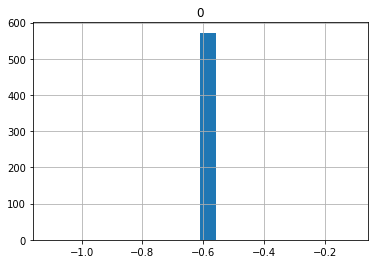

In [29]:
pred = model.predict(X_test)
pred = pd.DataFrame(pred)
pred.hist(bins = 20)

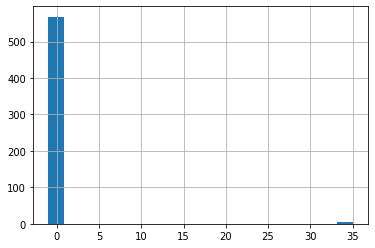

In [30]:
y_test.hist(bins = 20)